## Atividade 5 - Alice da Silva de Lima 18/0112601

In [2]:
#!pip install keras
#!pip install tensorflow

In [3]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
path_train = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013train-A.txt'
path_test = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013test-A.txt'
path_valid = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013dev-A.txt'

In [5]:
df_train = pd.read_csv(path_train,names=['id','polarity','text'],sep='\t')
df_valid = pd.read_csv(path_valid,names=['id','polarity','text'],sep='\t')
df_test = pd.read_csv(path_test,names=['id','polarity','text'],sep='\t')

In [6]:
df_test

,id,polarity,text
0,264238274963451904,positive,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,positive,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,negative,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,neutral,"Excuse the connectivity of this live stream, f..."
...,...,...,...
3542,264233437060288512,negative,Khaleda Zia's present India visit may have a b...
3543,263779058284904448,neutral,"FYI, golf fans: @jameslepp will join Moj on We..."
3544,250744453831213056,negative,@__Aniko you think mr.Calle let practice with ...
3545,258679974591090688,positive,Don't hide under your desk! It's just a salsa ...


In [7]:
print(f'Train size {df_train.shape}')
print(f'Valid size {df_valid.shape}')
print(f'Test size {df_test.shape}')

Train size (9684, 3)
Valid size (1654, 3)
Test size (3547, 3)


In [8]:
df_train = df_train.drop(labels=['id'],axis=1)
df_valid = df_valid.drop(labels=['id'],axis=1)
df_test = df_test.drop(labels=['id'],axis=1)

In [9]:
vectorizer = TfidfVectorizer(norm=None,lowercase=True,stop_words="english",max_df=0.95,min_df=2)

vectorizer.fit(df_train['text'])

tfidf_train = vectorizer.transform(df_train['text']).toarray()
tfidf_valid = vectorizer.transform(df_valid['text']).toarray()
tfidf_test = vectorizer.transform(df_test['text']).toarray()

In [10]:
df_train['polarity'] = pd.Categorical(df_train['polarity'])
y_train_int = df_train['polarity'].cat.codes

df_valid['polarity'] = pd.Categorical(df_valid['polarity'])
y_valid_int = df_valid['polarity'].cat.codes

df_test['polarity'] = pd.Categorical(df_test['polarity'])
y_test_int = df_test['polarity'].cat.codes

In [11]:
y_train = to_categorical(y_train_int)
y_valid = to_categorical(y_valid_int)
y_test = to_categorical(y_test_int)

In [12]:
X_train = tfidf_train
X_valid = tfidf_valid
X_test = tfidf_test

In [13]:
N = tfidf_train.shape[0]
vocab_size = tfidf_train.shape[1]
print(f'Quantidade de instancias de treinamento {N} e tamanho do vocabulario {vocab_size}')

Quantidade de instancias de treinamento 9684 e tamanho do vocabulario 7654


Arquitetura da Rede Multilayer Perceptron Profunda

Hyperparâmetros da rede

In [14]:
number_of_neurons_layer1 = 20
number_of_neurons_layer2 = 10
number_of_neurons_output = 3
lr = 0.01

In [15]:
model = Sequential()
# Input Layer
model.add(Dense(number_of_neurons_layer1,input_dim=vocab_size,activation='sigmoid'))
model.add(Dense(number_of_neurons_layer2,activation='sigmoid'))
model.add(Dense(number_of_neurons_output,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                153100    
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 153,343
Trainable params: 153,343
Non-trainable params: 0
_________________________________________________________________


In [16]:
sgd = SGD(learning_rate=lr)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=50)

Epoch 1/50
303/303 [==============================] - 2s 5ms/step - loss: 1.0492 - accuracy: 0.4248 - val_loss: 1.0594 - val_accuracy: 0.4468
Epoch 2/50
303/303 [==============================] - 1s 5ms/step - loss: 1.0018 - accuracy: 0.4737 - val_loss: 1.0587 - val_accuracy: 0.4468
Epoch 3/50
303/303 [==============================] - 1s 4ms/step - loss: 0.9981 - accuracy: 0.4738 - val_loss: 1.0543 - val_accuracy: 0.4474
Epoch 4/50
303/303 [==============================] - 1s 4ms/step - loss: 0.9939 - accuracy: 0.4759 - val_loss: 1.0519 - val_accuracy: 0.4516
Epoch 5/50
303/303 [==============================] - 1s 4ms/step - loss: 0.9894 - accuracy: 0.4796 - val_loss: 1.0479 - val_accuracy: 0.4571
Epoch 6/50
303/303 [==============================] - 1s 4ms/step - loss: 0.9839 - accuracy: 0.4976 - val_loss: 1.0450 - val_accuracy: 0.4528
Epoch 7/50
303/303 [==============================] - 1s 4ms/step - loss: 0.9781 - accuracy: 0.5070 - val_loss: 1.0413 - val_accuracy: 0.4667
Epoch 

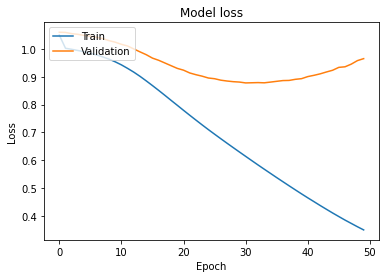

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

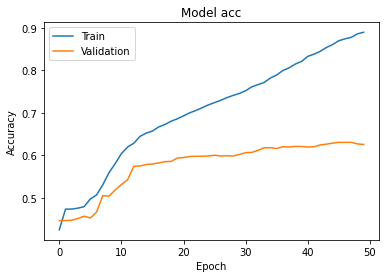

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Avaliação com os Dados de Teste

In [20]:
y = model.evaluate(X_test,y_test)

111/111 [==============================] - 0s 2ms/step - loss: 0.9594 - accuracy: 0.6386


In [21]:
import numpy as np
y_prob = model.predict(X_test)
y_prob

array([[0.11330992, 0.19981335, 0.6868768 ],
       [0.04845272, 0.00774754, 0.94379973],
       [0.03991197, 0.9194432 , 0.04064485],
       ...,
       [0.19422634, 0.5657903 , 0.23998341],
       [0.19865736, 0.05353709, 0.7478056 ],
       [0.17614374, 0.4997056 , 0.3241507 ]], dtype=float32)

In [22]:
y_pred = np.argmax(y_prob,axis=1)
y_pred

array([2, 2, 1, ..., 1, 2, 1])

In [23]:
y_test_int

0       2
1       2
2       1
3       0
4       1
       ..
3542    0
3543    1
3544    0
3545    2
3546    1
Length: 3547, dtype: int8



```
  0  1  2
0
1
2  
```



**Minha solução**

In [24]:
pred_matrix = [[0,0,0],[0,0,0],[0,0,0]]

for i in range(len(y_pred)):
  if(y_pred[i] == y_test_int[i]):
    if y_pred[i] == 0:
      pred_matrix[0][0] += 1
    elif y_pred[i] == 1:
      pred_matrix[1][1] += 1
    else:
      pred_matrix[2][2] += 1

  else:
    if(y_pred[i] == 0):
      if(y_test_int[i] == 1):
        pred_matrix[1][0] += 1
      else:
        pred_matrix[2][0] += 1

    elif(y_pred[i] == 1):
      if(y_test_int[i] == 0):
        pred_matrix[0][1] += 1
      else:
        pred_matrix[2][1] += 1
  
    else:
      if(y_test_int[i] == 1):
        pred_matrix[1][2] += 1
      else:
        pred_matrix[0][2] += 1

np.array(pred_matrix)
    


array([[ 105,  321,  133],
       [  22, 1191,  300],
       [  26,  480,  969]])

**Solução do professor**

In [25]:
matriz_conf = [[0,0,0],[0,0,0],[0,0,0]]

y_real = y_test_int


for i in range(0,len(y_pred)):
  matriz_conf[y_real[i]][y_pred[i]] += 1

np.array(matriz_conf) 

array([[ 105,  321,  133],
       [  22, 1191,  300],
       [  26,  480,  969]])

In [26]:
acuracia = (matriz_conf[0][0]+matriz_conf[1][1]+matriz_conf[2][2] )/ len(y_pred)
acuracia

0.6385678037778404

One against all



```
Positiva  All(neg,neu)
precisao
revocacao
f1-score

Neutra All(pos,neg)
precisao
revocacao
f1-score

Negativa All(pos,neu)
precisao
revocacao
f1-score
```



In [52]:
def f2(num):
    return int(num*100)/100.0

prec = []

prec.append(round(matriz_conf[0][0]/(matriz_conf[0][0] + matriz_conf[1][0] + matriz_conf[2][0]), 2))
prec.append(round(matriz_conf[1][1]/(matriz_conf[1][1] + matriz_conf[0][1] + matriz_conf[2][1]), 2))
prec.append(round(matriz_conf[2][2]/(matriz_conf[2][2] + matriz_conf[0][2] + matriz_conf[1][2]), 2))

rev = []

rev.append(round(matriz_conf[0][0]/(matriz_conf[0][0] + matriz_conf[0][1] + matriz_conf[0][2]), 2))
rev.append(round(matriz_conf[1][1]/(matriz_conf[1][1] + matriz_conf[1][0] + matriz_conf[1][2]), 2))
rev.append(round(matriz_conf[2][2]/(matriz_conf[2][2] + matriz_conf[2][0] + matriz_conf[2][1]), 2))

f1s = []

f1s.append(f2(2 * (prec[0]*rev[0]/(prec[0]+rev[0]))))
f1s.append(f2(2 * (prec[1]*rev[1]/(prec[1]+rev[1]))))
f1s.append(f2(2 * (prec[2]*rev[2]/(prec[2]+rev[2]))))


info = pd.DataFrame(
    {'precisão': prec,
     'revocação': rev,
     'f1-score': f1s
    })

info


,precisão,revocação,f1-score
0,0.69,0.19,0.29
1,0.60,0.79,0.68
2,0.69,0.66,0.67


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_real,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.19      0.29       559
           1       0.60      0.79      0.68      1513
           2       0.69      0.66      0.67      1475

    accuracy                           0.64      3547
   macro avg       0.66      0.54      0.55      3547
weighted avg       0.65      0.64      0.62      3547

